/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pytrends/request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)


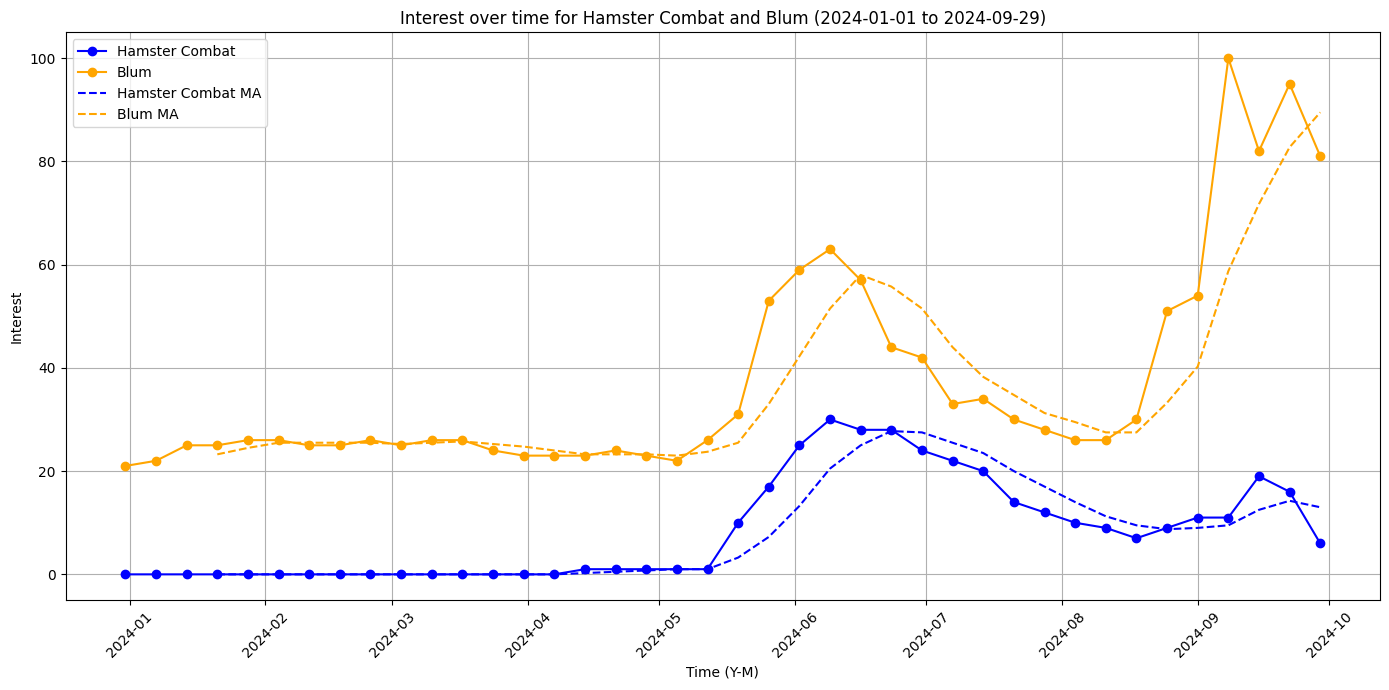

In [15]:
from pytrends.request import TrendReq
import pandas as pd
import matplotlib.pyplot as plt

pytrends = TrendReq(hl='en-US', tz=360)

search_terms = ["Hamster Combat", "Blum"]
pytrends.build_payload(search_terms, cat=0, timeframe='2024-01-01 2024-09-29', geo='', gprop='')

interest_over_time_df = pytrends.interest_over_time()

if not interest_over_time_df.empty:
    interest_over_time_df['Hamster Combat MA'] = interest_over_time_df['Hamster Combat'].rolling(window=4).mean()
    interest_over_time_df['Blum MA'] = interest_over_time_df['Blum'].rolling(window=4).mean()

    plt.figure(figsize=(14, 7))
    plt.plot(interest_over_time_df.index, interest_over_time_df['Hamster Combat'], marker='o', color='b', label='Hamster Combat')
    plt.plot(interest_over_time_df.index, interest_over_time_df['Blum'], marker='o', color='orange', label='Blum')

    plt.plot(interest_over_time_df.index, interest_over_time_df['Hamster Combat MA'], linestyle='--', color='blue', label='Hamster Combat MA')
    plt.plot(interest_over_time_df.index, interest_over_time_df['Blum MA'], linestyle='--', color='orange', label='Blum MA')

    plt.title('Interest over time for Hamster Combat and Blum (2024-01-01 to 2024-09-29)')
    plt.xlabel('Time (Y-M)')
    plt.ylabel('Interest')
    plt.legend()
    plt.grid()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("No interest over time data found for the given timeframe.")
